<img src="https://raw.githubusercontent.com/rhatiro/Curso_EBAC-Profissao_Cientista_de_Dados/main/ebac-course-utils/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Profissão: Cientista de Dados**
### **Módulo 6** | Descritiva I | Exercício 3

Aluno [Marcio da Silva](https://github.com/marciolws)<br>
Data: 22 de junho de 2024.

---

# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [2]:
#Iniciamos carregando as bibiliotes que serão utilizadas.
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib notebook

In [3]:
#Carregando CSV dos dados a serem utilizados.
df = pd.read_csv('sinasc_RO_2019.csv')

In [5]:
df.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [6]:
#Gerando infrmacoes do CSV.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [7]:
#Usei o .loc para categorizo o APGAR5 de acordo com as condições acima.

df.loc[df['APGAR5'] <=3, 'APGAR5_CAT'] = 'asfixia grave'
df.loc[(df['APGAR5'] >=4) & (df['APGAR5'] <=5), 'APGAR5_CAT'] = 'asfixia moderada'
df.loc[(df['APGAR5'] >=6) & (df['APGAR5'] <=7), 'APGAR5_CAT'] = 'asfixia leve'
df.loc[df['APGAR5'] >=8, 'APGAR5_CAT'] = 'normal'

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

In [8]:
#Montei os itens da categorização em uma lista. A lista será usada para rotacionar a legenda.

valores_APGAR5_CAT = ['asfixia grave',
                      'asfixia moderada',
                      'asfixia leve',
                      'normal']

<Axes: xlabel='APGAR5_CAT', ylabel='count'>

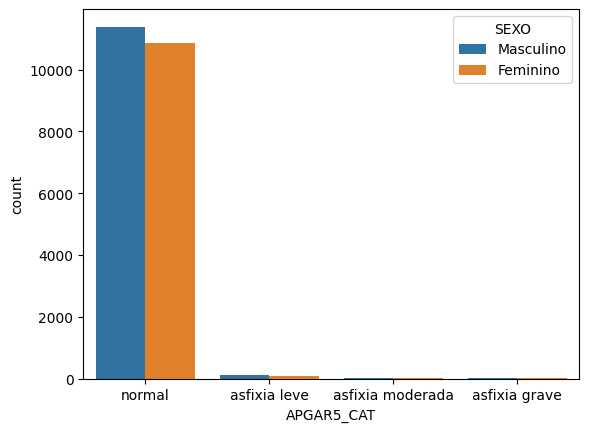

In [9]:
#Fiz o gráfico do APGAR5_CAT, separando por SEXO, filtrado de 37 a 41 semanas.

sns.countplot(x='APGAR5_CAT', hue='SEXO', data=df[df.GESTACAO == '37 a 41 semanas'])

/var/folders/32/kwgsty_91mgcby362gfpdsr80000gn/T/ipykernel_2923/3945139708.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 0].set_xticklabels(valores_APGAR5_CAT, rotation=45)
/var/folders/32/kwgsty_91mgcby362gfpdsr80000gn/T/ipykernel_2923/3945139708.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 1].set_xticklabels(valores_APGAR5_CAT, rotation=45)
/var/folders/32/kwgsty_91mgcby362gfpdsr80000gn/T/ipykernel_2923/3945139708.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 2].set_xticklabels(valores_APGAR5_CAT, rotation=45)
/var/folders/32/kwgsty_91mgcby362gfpdsr80000gn/T/ipykernel_2923/3945139708.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks()

[Text(0, 0, 'asfixia leve'), Text(1, 0, 'asfixia grave'), Text(2, 0, 'normal')]

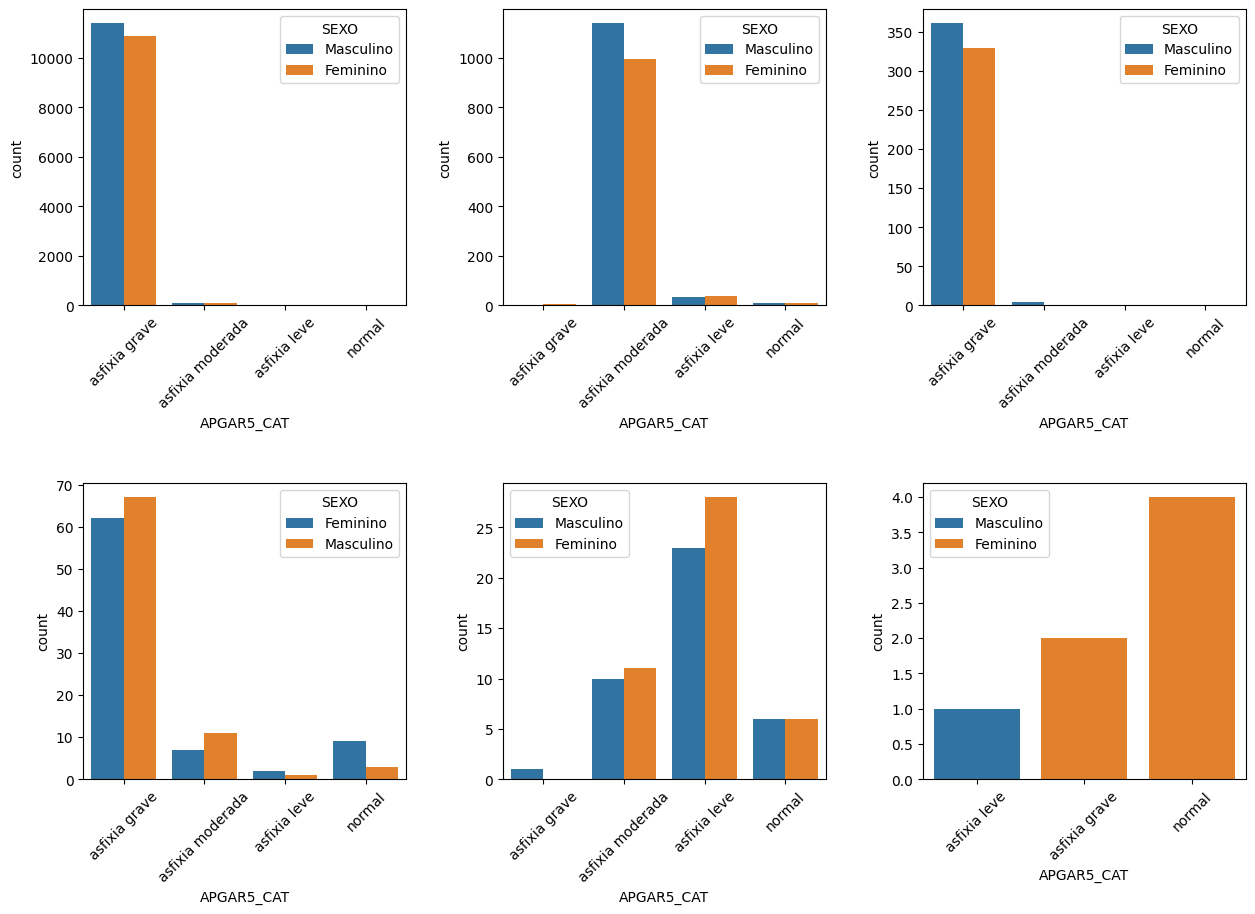

In [15]:
#Coloquei todos os gráficos em um subplot para facil vizualização

plt.rc('figure', figsize=(15, 10))
fig, axes = plt.subplots(nrows=2, ncols=3)

sns.countplot(ax=axes[0, 0], x='APGAR5_CAT', hue='SEXO', data=df[df.GESTACAO == '37 a 41 semanas'])
sns.countplot(ax=axes[0, 1], x='APGAR5_CAT', hue='SEXO', data=df[df.GESTACAO == '32 a 36 semanas'])
sns.countplot(ax=axes[0, 2], x='APGAR5_CAT', hue='SEXO', data=df[df.GESTACAO == '42 semanas e mais'])
sns.countplot(ax=axes[1, 0], x='APGAR5_CAT', hue='SEXO', data=df[df.GESTACAO == '28 a 31 semanas'])
sns.countplot(ax=axes[1, 1], x='APGAR5_CAT', hue='SEXO', data=df[df.GESTACAO == '22 a 27 semanas'])
sns.countplot(ax=axes[1, 2], x='APGAR5_CAT', hue='SEXO', data=df[df.GESTACAO == 'Menos de 22 semanas'])

#Foi adicionado o espaçamento entre os gráficos para que não fique informação sobreposta.

plt.subplots_adjust(wspace=0.3, hspace=0.6)

#Fiz o rotacionamento dos nomes no eixo x em 45° para que elas não fiquem sobrepostas.

axes[0, 0].set_xticklabels(valores_APGAR5_CAT, rotation=45)
axes[0, 1].set_xticklabels(valores_APGAR5_CAT, rotation=45)
axes[0, 2].set_xticklabels(valores_APGAR5_CAT, rotation=45)
axes[1, 0].set_xticklabels(valores_APGAR5_CAT, rotation=45)
axes[1, 1].set_xticklabels(valores_APGAR5_CAT, rotation=45)
axes[1, 2].set_xticklabels(['asfixia leve', 'asfixia grave', 'normal'], rotation=45)

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [18]:
#Montei uma tabela cruzada com o APGAR5 e a GESTACAO

apgar5_gestacao = pd.crosstab(df['APGAR5'], df['GESTACAO'])

In [19]:
apgar5_gestacao

GESTACAO,22 a 27 semanas,28 a 31 semanas,32 a 36 semanas,37 a 41 semanas,42 semanas e mais,Menos de 22 semanas
APGAR5,,,,,,
0.0,7,0,2,5,1,1
1.0,0,0,2,20,0,0
2.0,8,2,2,3,0,1
3.0,6,1,2,5,0,0
4.0,1,5,8,7,0,0
5.0,0,7,11,21,1,0
6.0,2,7,17,45,1,0
7.0,10,11,56,151,5,1
8.0,24,61,362,1417,44,0


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [20]:
#Fiz a tabela de frequencia usando a função div.

freq_tab = apgar5_gestacao.div(apgar5_gestacao.sum(axis=1), axis=0)

In [21]:
freq_tab

GESTACAO,22 a 27 semanas,28 a 31 semanas,32 a 36 semanas,37 a 41 semanas,42 semanas e mais,Menos de 22 semanas
APGAR5,,,,,,
0.0,0.437500,0.000000,0.125000,0.312500,0.062500,0.062500
1.0,0.000000,0.000000,0.090909,0.909091,0.000000,0.000000
2.0,0.500000,0.125000,0.125000,0.187500,0.000000,0.062500
3.0,0.428571,0.071429,0.142857,0.357143,0.000000,0.000000
4.0,0.047619,0.238095,0.380952,0.333333,0.000000,0.000000
5.0,0.000000,0.175000,0.275000,0.525000,0.025000,0.000000
6.0,0.027778,0.097222,0.236111,0.625000,0.013889,0.000000
7.0,0.042735,0.047009,0.239316,0.645299,0.021368,0.004274
8.0,0.012579,0.031971,0.189727,0.742662,0.023061,0.000000


In [22]:
freq_tab.sum(axis=1)

APGAR5
0.0     1.0
1.0     1.0
2.0     1.0
3.0     1.0
4.0     1.0
5.0     1.0
6.0     1.0
7.0     1.0
8.0     1.0
9.0     1.0
10.0    1.0
dtype: float64

####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

<Axes: xlabel='APGAR5'>

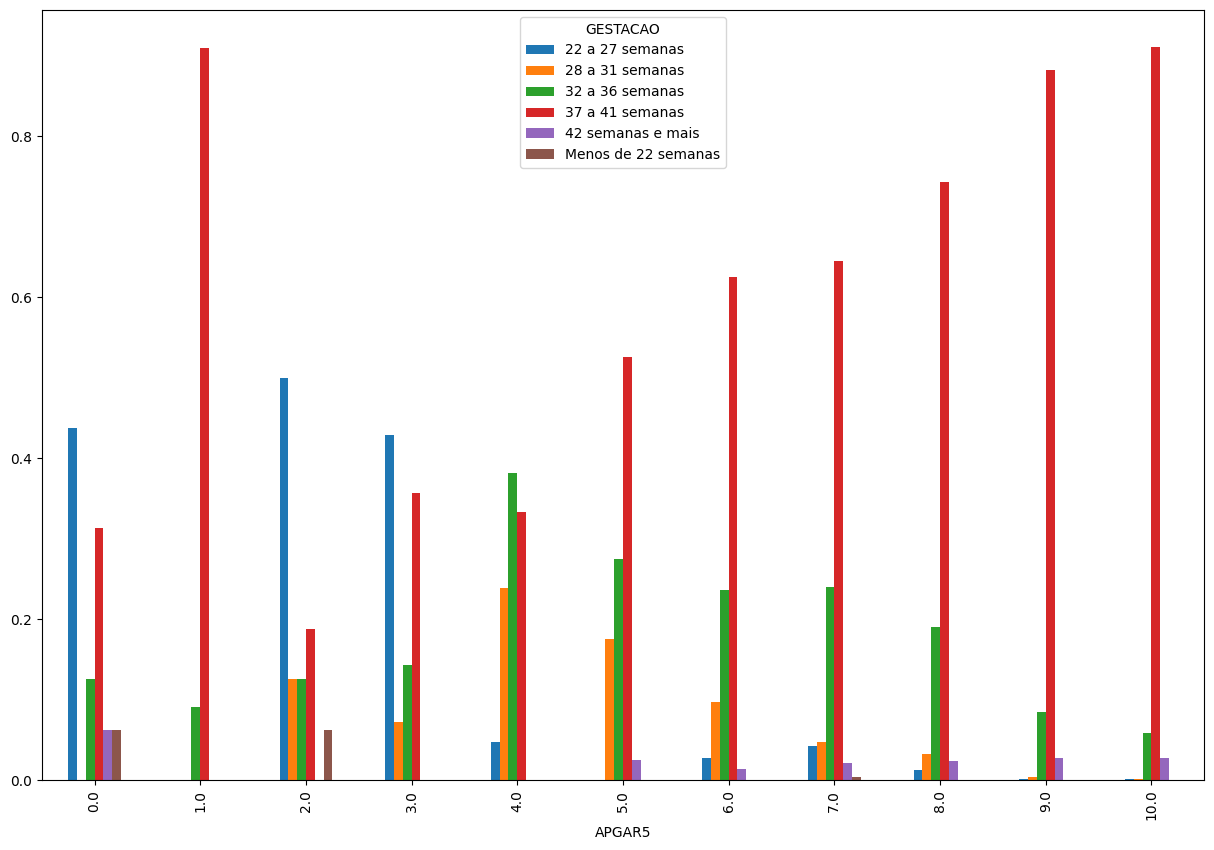

In [23]:
#Plot do APGAR5 com porcentagem.

#Analisando o gráfico foi notado que em partos com com menos de 37 semanas o APGAR5 é mais baixo.

freq_tab.plot.bar()

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

In [24]:
#Como temos diversos pesos diferentes, categorizarei de 1 em 1 kg, seguindo os passos apresentados anteriormente.

df.loc[df['PESO'] <=2000, 'PESO_CAT'] = 'menor que 2'
df.loc[(df['PESO'] >2000) & (df['PESO'] <=3000), 'PESO_CAT'] = 'entre 2 e 3'
df.loc[(df['PESO'] >3000) & (df['PESO'] <=4000), 'PESO_CAT'] = 'entre 3 e 4'
df.loc[(df['PESO'] >4000) & (df['PESO'] <=5000), 'PESO_CAT'] = 'entre 4 e 5'
df.loc[(df['PESO'] >5000), 'PESO_CAT'] = 'maior que 5'


In [25]:
df.PESO

0        3685
1        3055
2        3460
3        2982
4        3310
         ... 
27023    2110
27024    3310
27025    3065
27026    2352
27027    4240
Name: PESO, Length: 27028, dtype: int64

In [26]:
df.PESO_CAT

0        entre 3 e 4
1        entre 3 e 4
2        entre 3 e 4
3        entre 2 e 3
4        entre 3 e 4
            ...     
27023    entre 2 e 3
27024    entre 3 e 4
27025    entre 3 e 4
27026    entre 2 e 3
27027    entre 4 e 5
Name: PESO_CAT, Length: 27028, dtype: object

In [27]:
apgar5_peso = pd.crosstab(df['APGAR5_CAT'], df['PESO_CAT'])

In [28]:
apgar5_peso

PESO_CAT,entre 2 e 3,entre 3 e 4,entre 4 e 5,maior que 5,menor que 2
APGAR5_CAT,,,,,
asfixia grave,12,22,3,1,36
asfixia leve,89,158,11,0,62
asfixia moderada,17,25,1,0,25
normal,6630,17745,1519,11,558


In [29]:
freq_tab_peso = apgar5_peso.div(apgar5_peso.sum(axis=1), axis=0)

In [30]:
freq_tab_peso

PESO_CAT,entre 2 e 3,entre 3 e 4,entre 4 e 5,maior que 5,menor que 2
APGAR5_CAT,,,,,
asfixia grave,0.162162,0.297297,0.040541,0.013514,0.486486
asfixia leve,0.278125,0.493750,0.034375,0.000000,0.193750
asfixia moderada,0.250000,0.367647,0.014706,0.000000,0.367647
normal,0.250538,0.670559,0.057401,0.000416,0.021086


In [31]:
freq_tab_peso.sum(axis=1)

APGAR5_CAT
asfixia grave       1.0
asfixia leve        1.0
asfixia moderada    1.0
normal              1.0
dtype: float64

<Axes: xlabel='APGAR5_CAT'>

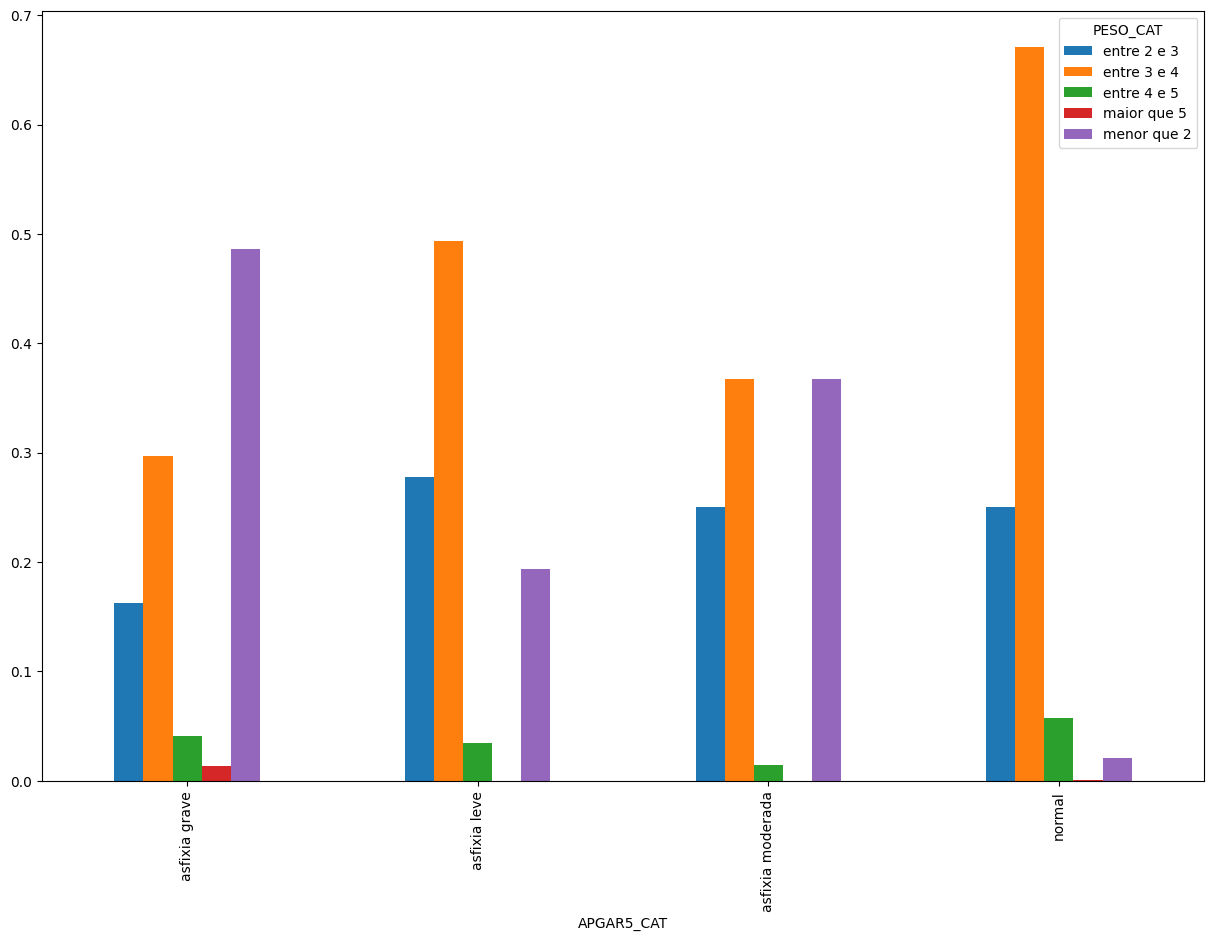

In [32]:
#Podemos bservar no gráfico que a porcentagem de casos graves de asfixia ocorrem com bebes mais leves.
#Os casos normais ocorrem em bebes com peso entre 3 e 4 kg.
#Existe uma relação entre o PESO e o APGAR5, mas não é diretamente proporcional.

freq_tab_peso.plot.bar()